In [3]:
import tensorflow
import pandas as pd
import numpy as np
import sklearn

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [48]:
import pandas as pd
import numpy as np

order_df = pd.read_csv('/content/drive/MyDrive/마켓컬리/orders.csv')
member_df = pd.read_csv("/content/drive/MyDrive/마켓컬리/Member_data.csv")
product_df = pd.read_csv("/content/drive/MyDrive/마켓컬리/product_final.csv")
order_product_prior = pd.read_csv(("/content/drive/MyDrive/마켓컬리/order_products__prior.csv"))
order_product_train = pd.read_csv(("/content/drive/MyDrive/마켓컬리/order_products__train.csv"))


order_df.info()
member_df.info()
product_df.info()
order_product_prior.info()
order_product_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3421083 entries, 0 to 3421082
Data columns (total 7 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   eval_set                object 
 3   order_number            int64  
 4   order_dow               int64  
 5   order_hour_of_day       int64  
 6   days_since_prior_order  float64
dtypes: float64(1), int64(5), object(1)
memory usage: 182.7+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206209 entries, 0 to 206208
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype
---  ------             --------------   -----
 0   Unnamed: 0         206209 non-null  int64
 1   User_id            206209 non-null  int64
 2   Gender             206209 non-null  int64
 3   Age                206209 non-null  int64
 4   Membership         206209 non-null  int64
 5   Prior_Month_Spend  206209 non-null  int64
 6   

In [49]:
member_df = member_df.drop("Unnamed: 0", axis=1)
product_df = product_df.drop("Unnamed: 0", axis=1)

In [50]:
order_df.head(10)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0
5,3367565,1,prior,6,2,7,19.0
6,550135,1,prior,7,1,9,20.0
7,3108588,1,prior,8,1,14,14.0
8,2295261,1,prior,9,1,16,0.0
9,2550362,1,prior,10,4,8,30.0


In [51]:
member_df.head(10)

,User_id,Gender,Age,Membership,Prior_Month_Spend,aisle_id,aisle_id_2
0,1,1,28,2,196643,53,81
1,2,1,37,3,770058,2,106
2,3,1,45,3,995947,48,60
3,4,1,31,2,264114,102,84
4,5,1,35,5,1996585,47,115
5,6,1,30,2,218929,31,28
6,7,1,29,3,532136,3,8
7,8,1,29,2,205585,17,129
8,9,1,40,4,1043862,79,6
9,10,1,40,2,296354,89,45


In [52]:
product_df.head(10)

,product_id,product_name,aisle_id,Category_no,Category_name,standard_price(won),price(won),Only_kurly,discount(%),No_of_reviews,Monthly_Avg_Sales_Qty
0,1,Chocolate Sandwich Cookies,61,19,snacks,6900,4625,1,32.97,0,755.9
1,2,All-Seasons Salt,104,13,pantry,29800,27150,1,8.89,416,3509.5
2,3,Robust Golden Unsweetened Oolong Tea,94,7,beverages,16100,8927,0,44.55,173,2906.3
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1,frozen,11000,5406,0,50.85,48,4356.7
4,5,Green Chile Anytime Sauce,5,13,pantry,21600,20954,0,2.99,50,4027.8
5,6,Dry Nose Oil,11,11,personal care,27000,26073,1,3.43,230,2175.9
6,7,Pure Coconut Water With Orange,98,7,beverages,17000,9271,0,45.46,326,1571.7
7,8,Cut Russet Potatoes Steam N' Mash,116,1,frozen,3200,1733,1,45.83,283,717.3
8,9,Light Strawberry Blueberry Yogurt,120,16,dairy eggs,19500,17838,1,8.52,174,3329.1
9,10,Sparkling Orange Juice & Prickly Pear Beverage,115,7,beverages,97600,72067,0,26.16,340,2152.2


In [53]:
order_product_prior.head(10)

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0
5,2,17794,6,1
6,2,40141,7,1
7,2,1819,8,1
8,2,43668,9,0
9,3,33754,1,1


In [54]:
order_df.isna().sum()

order_id                       0
user_id                        0
eval_set                       0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    206209
dtype: int64

# 'aisle_name' 안 넣은 버전

# 데이터 전처리 : 결츨치 처리 및 데이터 샘플링

In [55]:
# 결측치 처리('days_since_prior_order':첫 구매인경우 nan값이 입력되어 있음 => 0으로 대체)
#orders['days_since_prior_order'] = orders['days_since_prior_order'].fillna(0)
orders = order_df.dropna()

In [56]:
print(order_df.shape)
orders['eval_set'].value_counts()

(3421083, 7)


prior    3008665
train     131209
test       75000
Name: eval_set, dtype: int64

In [57]:
orders[(orders['user_id']==10)] # => 주문데이터 분석: 유저당 prior주문기록, train주문기록이 있는 유저들이 있음

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
84,68288,10,prior,2,5,15,30.0
85,2115522,10,prior,3,3,19,12.0
86,83395,10,prior,4,3,15,14.0
87,1353310,10,prior,5,5,20,23.0
88,1822501,10,train,6,0,19,30.0


In [58]:
orders[orders['user_id'].isin(orders['user_id'][orders['eval_set']=='test'])] # test data -> order_product 정보가 없음

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
27,444309,3,prior,2,3,19,9.0
28,3002854,3,prior,3,3,16,21.0
29,2037211,3,prior,4,2,18,20.0
30,2710558,3,prior,5,0,17,12.0
31,1972919,3,prior,6,0,16,7.0
...,...,...,...,...,...,...,...
3421064,3059777,206208,prior,46,1,10,13.0
3421065,2239861,206208,prior,47,3,4,9.0
3421066,1285346,206208,prior,48,1,11,5.0
3421067,1882108,206208,prior,49,1,22,7.0


In [59]:
orders['user_id'].value_counts()

152340    99
185641    99
185524    99
81678     99
70922     99
          ..
13046      3
70208      3
111440     3
31762      3
47980      3
Name: user_id, Length: 206209, dtype: int64

In [60]:
import random
random.seed(2021)

# 1만명의 유저만 샘플링 (첫시도)
user = random.sample(orders['user_id'][orders['eval_set']=='train'].unique().tolist(), 10000)
#user = orders['user_id'][orders['eval_set']=='train'].unique().tolist() #샘플링 안하고 시도 (실패)
# orders에서 test dataset 관련 기록(prior포함) 제외
orders_2 = orders[orders['user_id'].isin(user)]

In [61]:
print("유저 인원:",len(user), "// 주문건수 합:",len(orders_2))

유저 인원: 10000 // 주문건수 합: 155579


In [62]:
# order_product_prior에서 test dataset 관련 기록 제외
order_product_prior = order_product_prior[order_product_prior['order_id'].isin(orders_2['order_id'])]

In [63]:
order_product_prior

,order_id,product_id,add_to_cart_order,reordered
56,6,40462,1,0
57,6,15873,2,0
58,6,41897,3,0
566,69,43875,1,1
567,69,27845,2,1
...,...,...,...,...
32434218,3421047,18523,4,1
32434219,3421047,20114,5,1
32434220,3421047,33664,6,0
32434221,3421047,39993,7,1


In [64]:
orders_2

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
660,3166874,48,prior,2,5,13,27.0
661,2766710,48,prior,3,6,9,15.0
662,501067,48,prior,4,5,12,27.0
663,1643524,48,prior,5,6,10,29.0
664,1657641,48,prior,6,5,9,27.0
...,...,...,...,...,...,...,...
3420619,1940839,206185,prior,7,1,20,30.0
3420620,880404,206185,prior,8,3,16,30.0
3420621,1619874,206185,prior,9,5,8,23.0
3420622,2768099,206185,prior,10,5,7,7.0


In [65]:
product_df

,product_id,product_name,aisle_id,Category_no,Category_name,standard_price(won),price(won),Only_kurly,discount(%),No_of_reviews,Monthly_Avg_Sales_Qty
0,1,Chocolate Sandwich Cookies,61,19,snacks,6900,4625,1,32.97,0,755.9
1,2,All-Seasons Salt,104,13,pantry,29800,27150,1,8.89,416,3509.5
2,3,Robust Golden Unsweetened Oolong Tea,94,7,beverages,16100,8927,0,44.55,173,2906.3
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1,frozen,11000,5406,0,50.85,48,4356.7
4,5,Green Chile Anytime Sauce,5,13,pantry,21600,20954,0,2.99,50,4027.8
...,...,...,...,...,...,...,...,...,...,...,...
49683,49684,"Vodka, Triple Distilled, Twist of Vanilla",124,5,alcohol,33500,22190,1,33.76,428,4130.0
49684,49685,En Croute Roast Hazelnut Cranberry,42,1,frozen,34800,18294,0,47.43,54,2031.2
49685,49686,Artisan Baguette,112,3,bakery,90100,70449,0,21.81,300,454.0
49686,49687,Smartblend Healthy Metabolism Dry Cat Food,41,8,pets,81200,65033,1,19.91,334,164.8


In [66]:
# order_product_prior에서 test dataset 관련 기록 제외
order_product_prior = order_product_prior[order_product_prior['order_id'].isin(orders_2['order_id'])]

In [68]:
product_df.iloc[:, :5]

,product_id,product_name,aisle_id,Category_no,Category_name
0,1,Chocolate Sandwich Cookies,61,19,snacks
1,2,All-Seasons Salt,104,13,pantry
2,3,Robust Golden Unsweetened Oolong Tea,94,7,beverages
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1,frozen
4,5,Green Chile Anytime Sauce,5,13,pantry
...,...,...,...,...,...
49683,49684,"Vodka, Triple Distilled, Twist of Vanilla",124,5,alcohol
49684,49685,En Croute Roast Hazelnut Cranberry,42,1,frozen
49685,49686,Artisan Baguette,112,3,bakery
49686,49687,Smartblend Healthy Metabolism Dry Cat Food,41,8,pets


In [69]:
product_m = product_df.iloc[:, :5]

In [70]:
order_product = pd.concat([order_product_prior,order_product_train]) 
order_product

,order_id,product_id,add_to_cart_order,reordered
56,6,40462,1,0
57,6,15873,2,0
58,6,41897,3,0
566,69,43875,1,1
567,69,27845,2,1
...,...,...,...,...
1384612,3421063,14233,3,1
1384613,3421063,35548,4,1
1384614,3421070,35951,1,1
1384615,3421070,16953,2,1


In [71]:
# 주문 항목 정보 : product_m + order_product
order_detail = order_product.merge(product_m,how='left') #.sample(n=100000, random_state=2021)

In [72]:
order_detail#.sort_values(by=order_detail['order_id'])

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,Category_no,Category_name
0,6,40462,1,0,Cleanse,31,7,beverages
1,6,15873,2,0,Dryer Sheets Geranium Scent,75,17,household
2,6,41897,3,0,Clean Day Lavender Scent Room Freshener Spray,101,17,household
3,69,43875,1,1,Baby Food Stage 2 Blueberry Pear & Purple Carrot,92,18,babies
4,69,27845,2,1,Organic Whole Milk,84,16,dairy eggs
...,...,...,...,...,...,...,...,...
2844699,3421063,14233,3,1,Natural Artesian Water,115,7,beverages
2844700,3421063,35548,4,1,Twice Baked Potatoes,13,20,deli
2844701,3421070,35951,1,1,Organic Unsweetened Almond Milk,91,16,dairy eggs
2844702,3421070,16953,2,1,Creamy Peanut Butter,88,13,pantry


In [73]:
data = orders_2.merge(order_detail)#, on ='order_id')

In [74]:
data

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,Category_no,Category_name
0,3166874,48,prior,2,5,13,27.0,45007,1,0,Organic Zucchini,83,4,produce
1,3166874,48,prior,2,5,13,27.0,22613,2,0,Organic African Nectar Herbal Tea,94,7,beverages
2,3166874,48,prior,2,5,13,27.0,28842,3,0,Bunched Cilantro,16,4,produce
3,3166874,48,prior,2,5,13,27.0,21405,4,0,"Organic Red Radish, Bunch",83,4,produce
4,3166874,48,prior,2,5,13,27.0,26209,5,0,Limes,24,4,produce
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1566105,2048154,206185,train,11,4,13,20.0,24097,7,0,Rotini Pasta,131,9,dry goods pasta
1566106,2048154,206185,train,11,4,13,20.0,14852,8,1,All Natural Marinara Sauce,9,9,dry goods pasta
1566107,2048154,206185,train,11,4,13,20.0,27061,9,0,Sweet Potato Apple Stage 2 Baby Food,92,18,babies
1566108,2048154,206185,train,11,4,13,20.0,19627,10,0,Butternut Squash Pear Stage 2 Baby Food,92,18,babies


In [75]:
data.isna().sum()

order_id                  0
user_id                   0
eval_set                  0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
product_id                0
add_to_cart_order         0
reordered                 0
product_name              0
aisle_id                  0
Category_no               0
Category_name             0
dtype: int64

# 데이터 탐색적 분석 (EDA)

## 주문 행태 분석

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5e3e14e950>]],
      dtype=object)

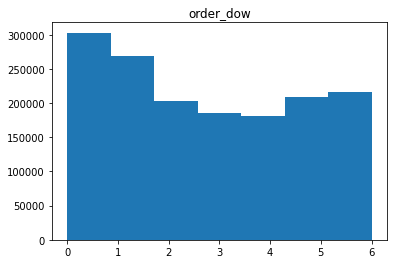

In [76]:
# 요일별 주문 현황

data['order_dow'].value_counts()

data.hist('order_dow',grid=False, bins=7)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5e3dab99d0>]],
      dtype=object)

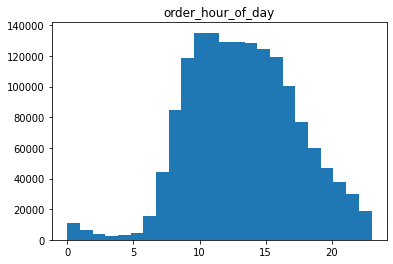

In [77]:
# 시간대별 주문 현황

data['order_hour_of_day'].value_counts()

data.hist('order_hour_of_day',grid=False, bins=24)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5e3d5f67d0>]],
      dtype=object)

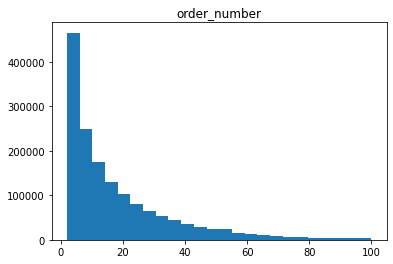

In [78]:
# 주문 횟수 현황 
data['order_number'].value_counts()

data.hist('order_number',grid=False, bins=24)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5e3d577fd0>]],
      dtype=object)

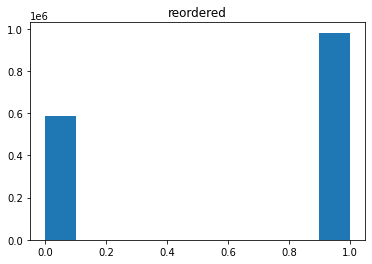

In [79]:

# 재주문 여부 현황 
data['reordered'].value_counts()

data.hist('reordered',grid=False)

In [80]:
data.columns

Index(['order_id', 'user_id', 'eval_set', 'order_number', 'order_dow',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'Category_no', 'Category_name'],
      dtype='object')

# 3-1) 데이터 전처리(data preprocessing)

## 데이터 Encoding

In [81]:
data['user_id'] = data['user_id'].astype(int)
data['product_id'] = data['product_id'].astype(int)
data['order_id'] = data['order_id'].astype(int)
data['days_since_prior_order'] = data['days_since_prior_order'].astype(int)

data = data.set_index(['user_id']).sort_index()
data = data.reset_index()

In [82]:
# 유저 인덱스 인코딩
user_ids = data["user_id"].unique().tolist()
user2user_encoded = {x: i for i, x in enumerate(user_ids)}
#userencoded2user = {i: x for i, x in enumerate(user_ids)}

# 주문 인덱스 인코딩
order_ids = data["order_id"].unique().tolist()
order2order_encoded = {x: i for i, x in enumerate(order_ids)}
#order_encoded2order = {i: x for i, x in enumerate(order_ids)}

# 상품 인덱스 인코딩
product_ids = data["product_id"].unique().tolist()
product2product_encoded = {x: i for i, x in enumerate(product_ids)}
#product_encoded2product = {i: x for i, x in enumerate(product_ids)}

# 상품 이름 인코딩
pd_name_ids = data["product_name"].unique().tolist()
pd_name2pd_name_encoded = {x: i for i, x in enumerate(pd_name_ids)}
#pd_name_encoded2pd_name = {i: x for i, x in enumerate(pd_name_ids)}

# 상품 대분류 인덱스 인코딩
department_ids = data["Category_no"].unique().tolist()
department2department_encoded = {x: i for i, x in enumerate(department_ids)}
#department_encoded2department = {i: x for i, x in enumerate(department_ids)}

# 상품 소분류 인덱스 인코딩
aisle_ids = data["aisle_id"].unique().tolist()
aisle2aisle_encoded = {x: i for i, x in enumerate(aisle_ids)}
#aisle_encoded2aisle = {i: x for i, x in enumerate(aisle_ids)}

# 상품 대분류명 인덱스 인코딩
dept_name_ids = data["Category_name"].unique().tolist()
dept_name2dept_name_encoded = {x: i for i, x in enumerate(dept_name_ids)}
#dept_name_encoded2dept_name = {i: x for i, x in enumerate(dept_name_ids)}



In [83]:
# 인코딩으로 바꾸기
data["user"] = data["user_id"].map(user2user_encoded)
data["product"] = data["product_id"].map(product2product_encoded)
data["order"] = data["order_id"].map(order2order_encoded)
data["pd_name"] = data["product_name"].map(pd_name2pd_name_encoded)

# data["department"] = data["department_id"].map(department2department_encoded)
# data["aisle"] = data["aisle"].map(aisle2aisle_encoded)
# data["dept_name"] = data["department"].map(dept_name2dept_name_encoded)
# data["aisle_name"] = data["aisle"].map(aisle_name2aisle_name_encoded)

##  User기준으로 데이터 조정(feature engineering)
- 구매자 기준으로 데이터프레임 재생성
- feature engineering 추가 가능

In [84]:
order_hist = data.groupby(['user'])['order_id'].unique().apply(list).reset_index()
product_hist = data.groupby(['user'])['product_id'].apply(list).reset_index()
order_dow_hist = data.groupby(['user'])['order_dow'].apply(list).reset_index() # unique().적용해보기
order_hour_of_day_hist = data.groupby(['user'])['order_hour_of_day'].apply(list).reset_index()
days_since_prior_order_hist = data.groupby(['user'])['days_since_prior_order'].apply(list).reset_index()

In [85]:
data.groupby(['user'])['order_dow'].unique().apply(list)

user
0                      [5, 6]
1             [1, 2, 3, 5, 4]
2             [4, 6, 0, 1, 2]
3       [0, 4, 1, 6, 2, 5, 3]
4                [4, 5, 2, 1]
                ...          
9995    [0, 2, 3, 5, 1, 6, 4]
9996       [2, 4, 3, 1, 5, 6]
9997                [0, 6, 5]
9998    [0, 1, 2, 4, 6, 3, 5]
9999          [3, 2, 1, 5, 4]
Name: order_dow, Length: 10000, dtype: object

In [86]:
order_product_hist = data.groupby(['order'])['product_id'].apply(list).reset_index()

In [87]:
order_hist # 사용자의 주문목록

,user,order_id
0,0,"[3166874, 2766710, 501067, 1643524, 1657641, 7..."
1,1,"[1318871, 1261384, 2100631, 580568, 1680554, 2..."
2,2,"[964058, 2163945, 3349827, 1376443, 2655621, 1..."
3,3,"[2568280, 1763414, 3092533, 414538, 1538989, 3..."
4,4,"[251784, 3211781, 1469604, 1515062, 1342998, 2..."
...,...,...
9995,9995,"[1911923, 549547, 3130715, 2582484, 1258873, 2..."
9996,9996,"[992039, 2551929, 1053779, 2760916, 1877978, 1..."
9997,9997,"[2822394, 83431, 56199, 1597643, 1782820]"
9998,9998,"[3115357, 1209728, 164466, 3304125, 1983173, 1..."


In [88]:
# 최다(빈도) 구매자의 주문 수(heavy user)

max([x for x in order_hist['order_id'].apply(len)])

99

In [89]:
product_hist # 사용자가 구매한 상품

,user,product_id
0,0,"[45007, 22613, 28842, 21405, 26209, 19508, 248..."
1,1,"[12341, 6184, 10441, 46149, 196, 14309, 46149,..."
2,2,"[49075, 39121, 21724, 48017, 36695, 28289, 391..."
3,3,"[34213, 34574, 7029, 25305, 41950, 31338, 4235..."
4,4,"[2186, 42699, 25753, 46496, 42139, 24157, 2415..."
...,...,...
9995,9995,"[20512, 18918, 17948, 24489, 13176, 19057, 817..."
9996,9996,"[12099, 40706, 43129, 48119, 8523, 7192, 35761..."
9997,9997,"[24852, 24710, 27307, 32642, 20919, 12508, 267..."
9998,9998,"[23650, 26165, 11087, 48775, 36305, 47977, 428..."


In [90]:
order_product_hist

,order,product_id
0,0,"[45007, 22613, 28842, 21405, 26209, 19508, 248..."
1,1,"[45007, 36695, 21405, 20339, 24830, 26209, 182..."
2,2,"[45007, 20339, 26209, 43662, 28842, 8057, 4399..."
3,3,"[47823, 20339, 4455, 26298, 17284, 4855, 45007..."
4,4,"[43662, 35855, 5621, 33000, 34012, 24940, 4455..."
...,...,...
155574,155574,"[49273, 34134, 35206, 35473, 10673]"
155575,155575,"[6052, 1716, 49296, 31268, 41673, 48337, 47167..."
155576,155576,"[4978, 24613, 1716, 6052, 49296]"
155577,155577,"[27966, 49273, 49296, 35206, 48337, 7658, 4015..."


In [91]:
# 주문 당 가장 많은 제품을 구입한 경우
max([x for x in order_product_hist['product_id'].apply(len)])

145

In [92]:
order_dow_hist

,user,order_dow
0,0,"[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, ..."
1,1,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
2,2,"[4, 4, 4, 4, 4, 4, 6, 6, 6, 6, 6, 6, 6, 6, 6, ..."
3,3,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4, 4, 4, 4, ..."
4,4,"[4, 4, 4, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, ..."
...,...,...
9995,9995,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
9996,9996,"[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, ..."
9997,9997,"[0, 0, 0, 0, 0, 0, 0, 0, 6, 6, 6, 6, 6, 6, 6, ..."
9998,9998,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, ..."


In [93]:
order_hour_of_day_hist

,user,order_hour_of_day
0,0,"[13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 1..."
1,1,"[10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 1..."
2,2,"[10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 1..."
3,3,"[9, 9, 9, 9, 9, 9, 9, 9, 9, 14, 14, 14, 14, 14..."
4,4,"[14, 14, 14, 14, 14, 14, 18, 18, 18, 18, 18, 1..."
...,...,...
9995,9995,"[15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 1..."
9996,9996,"[13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 1..."
9997,9997,"[19, 19, 19, 19, 19, 19, 19, 19, 21, 21, 21, 2..."
9998,9998,"[14, 14, 14, 14, 14, 14, 14, 14, 14, 9, 9, 9, ..."


In [94]:
days_since_prior_order_hist

,user,days_since_prior_order
0,0,"[27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 2..."
1,1,"[7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, ..."
2,2,"[10, 10, 10, 10, 10, 10, 30, 30, 30, 30, 30, 3..."
3,3,"[11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 1..."
4,4,"[8, 8, 8, 30, 30, 30, 20, 20, 20, 20, 20, 20, ..."
...,...,...
9995,9995,"[22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 2..."
9996,9996,"[19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 1..."
9997,9997,"[18, 18, 18, 18, 18, 18, 18, 18, 30, 30, 30, 3..."
9998,9998,"[28, 28, 28, 28, 28, 28, 28, 28, 28, 30, 30, 3..."


In [95]:
# User dataset 생성 (학습에 사용할 데이터, prior order:[data['eval_set']=='prior'])
user_data = data[['user','user_id']].merge(order_hist, how='left').merge(product_hist, how='left').merge(order_dow_hist, how='left').merge(order_hour_of_day_hist, how = 'left').merge(days_since_prior_order_hist,how='left') #eval_set
user_data

,user,user_id,order_id,product_id,order_dow,order_hour_of_day,days_since_prior_order
0,0,48,"[3166874, 2766710, 501067, 1643524, 1657641, 7...","[45007, 22613, 28842, 21405, 26209, 19508, 248...","[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, ...","[13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 1...","[27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 2..."
1,0,48,"[3166874, 2766710, 501067, 1643524, 1657641, 7...","[45007, 22613, 28842, 21405, 26209, 19508, 248...","[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, ...","[13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 1...","[27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 2..."
2,0,48,"[3166874, 2766710, 501067, 1643524, 1657641, 7...","[45007, 22613, 28842, 21405, 26209, 19508, 248...","[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, ...","[13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 1...","[27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 2..."
3,0,48,"[3166874, 2766710, 501067, 1643524, 1657641, 7...","[45007, 22613, 28842, 21405, 26209, 19508, 248...","[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, ...","[13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 1...","[27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 2..."
4,0,48,"[3166874, 2766710, 501067, 1643524, 1657641, 7...","[45007, 22613, 28842, 21405, 26209, 19508, 248...","[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, ...","[13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 1...","[27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 2..."
...,...,...,...,...,...,...,...
1566105,9999,206185,"[2275747, 1597200, 497488, 1874713, 1286942, 1...","[30217, 35473, 25915, 14852, 15829, 24613, 399...","[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, ...","[8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, ...","[26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 3..."
1566106,9999,206185,"[2275747, 1597200, 497488, 1874713, 1286942, 1...","[30217, 35473, 25915, 14852, 15829, 24613, 399...","[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, ...","[8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, ...","[26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 3..."
1566107,9999,206185,"[2275747, 1597200, 497488, 1874713, 1286942, 1...","[30217, 35473, 25915, 14852, 15829, 24613, 399...","[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, ...","[8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, ...","[26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 3..."
1566108,9999,206185,"[2275747, 1597200, 497488, 1874713, 1286942, 1...","[30217, 35473, 25915, 14852, 15829, 24613, 399...","[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, ...","[8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, ...","[26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 3..."


In [96]:
user_data = user_data.drop_duplicates('user') # 중복데이터 삭제
user_data.shape

(10000, 7)

In [97]:
data_product_prior=data['product'][data['eval_set']=='prior']

In [98]:
user_data['predict_labels'] = user_data['product_id'].apply(lambda x: int(random.uniform(0,data['product_id'].max())))
#user_data['predict_labels'] = user_data['product_id'].apply(lambda x: int(random.uniform(0,data['product'].max())))
# (random.uniform(0,data["product"][data['eval_set']=='prior'].max())) train 데이터의 product중 하나 (=> 알맞은 데이터가 들어가는지 코드 검증 필요)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [99]:
user_data

,user,user_id,order_id,product_id,order_dow,order_hour_of_day,days_since_prior_order,predict_labels
0,0,48,"[3166874, 2766710, 501067, 1643524, 1657641, 7...","[45007, 22613, 28842, 21405, 26209, 19508, 248...","[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, ...","[13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 1...","[27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 2...",28640
124,1,52,"[1318871, 1261384, 2100631, 580568, 1680554, 2...","[12341, 6184, 10441, 46149, 196, 14309, 46149,...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 1...","[7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, ...",47853
298,2,62,"[964058, 2163945, 3349827, 1376443, 2655621, 1...","[49075, 39121, 21724, 48017, 36695, 28289, 391...","[4, 4, 4, 4, 4, 4, 6, 6, 6, 6, 6, 6, 6, 6, 6, ...","[10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 1...","[10, 10, 10, 10, 10, 10, 30, 30, 30, 30, 30, 3...",48619
393,3,63,"[2568280, 1763414, 3092533, 414538, 1538989, 3...","[34213, 34574, 7029, 25305, 41950, 31338, 4235...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4, 4, 4, 4, ...","[9, 9, 9, 9, 9, 9, 9, 9, 9, 14, 14, 14, 14, 14...","[11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 1...",26678
895,4,83,"[251784, 3211781, 1469604, 1515062, 1342998, 2...","[2186, 42699, 25753, 46496, 42139, 24157, 2415...","[4, 4, 4, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, ...","[14, 14, 14, 14, 14, 14, 18, 18, 18, 18, 18, 1...","[8, 8, 8, 30, 30, 30, 20, 20, 20, 20, 20, 20, ...",19366
...,...,...,...,...,...,...,...,...
1564717,9995,206104,"[1911923, 549547, 3130715, 2582484, 1258873, 2...","[20512, 18918, 17948, 24489, 13176, 19057, 817...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 1...","[22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 2...",36353
1565137,9996,206123,"[992039, 2551929, 1053779, 2760916, 1877978, 1...","[12099, 40706, 43129, 48119, 8523, 7192, 35761...","[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, ...","[13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 1...","[19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 1...",29010
1565463,9997,206144,"[2822394, 83431, 56199, 1597643, 1782820]","[24852, 24710, 27307, 32642, 20919, 12508, 267...","[0, 0, 0, 0, 0, 0, 0, 0, 6, 6, 6, 6, 6, 6, 6, ...","[19, 19, 19, 19, 19, 19, 19, 19, 21, 21, 21, 2...","[18, 18, 18, 18, 18, 18, 18, 18, 30, 30, 30, 3...",37642
1565511,9998,206174,"[3115357, 1209728, 164466, 3304125, 1983173, 1...","[23650, 26165, 11087, 48775, 36305, 47977, 428...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, ...","[14, 14, 14, 14, 14, 14, 14, 14, 14, 9, 9, 9, ...","[28, 28, 28, 28, 28, 28, 28, 28, 28, 30, 30, 3...",11406


In [100]:
train_data = user_data[(user_data.user>=30) &
                       (user_data.user<=39)]
test_data = user_data[(user_data.user>=40) &
                      (user_data.user<=59)]

# 모델
- 어차피 후보군 20개를 뽑아서 조합을 할꺼라서 후보모델만 필요할 듯하다

In [101]:
data["product_id"].max()

49687

In [102]:
data["product"].max()

35053

In [103]:
# 하이퍼파라미터 정의

EMBEDDING_DIMS = 16
DENSE_UNITS = 64
DROPOUT_PCT = 0.1
ALPHA = 0.1
NUM_CLASSES = data["product_id"].max() + 2 
LEARNING_RATE = 0.1

In [104]:
# custom layers

import tensorflow as tf
class MaskedEmbeddingsAggregatorLayer(tf.keras.layers.Layer):
    def __init__(self, agg_mode='sum', **kwargs):
        super(MaskedEmbeddingsAggregatorLayer, self).__init__(**kwargs)

        if agg_mode not in ['sum', 'mean']:
            raise NotImplementedError('mode {} not implemented!'.format(agg_mode))
        self.agg_mode = agg_mode
    
    @tf.function
    def call(self, inputs, mask=None):
        masked_embeddings = tf.ragged.boolean_mask(inputs, mask)
        if self.agg_mode == 'sum':
            aggregated =  tf.reduce_sum(masked_embeddings, axis=1)
        elif self.agg_mode == 'mean':
            aggregated = tf.reduce_mean(masked_embeddings, axis=1)
        return aggregated
    
    def get_config(self):
        # this is used when loading a saved model that uses a custom layer
        return {'agg_mode': self.agg_mode}
    
class L2NormLayer(tf.keras.layers.Layer):
    def __init__(self, **kwargs):
        super(L2NormLayer, self).__init__(**kwargs)
    
    @tf.function
    def call(self, inputs, mask=None):
        if mask is not None:
            inputs = tf.ragged.boolean_mask(inputs, mask).to_tensor()
        return tf.math.l2_normalize(inputs, axis=-1)

    def compute_mask(self, inputs, mask):
        return mask

In [105]:
# modeling
import tensorflow as tf
import datetime
import os

input_user = tf.keras.Input(shape=(None, ), name='user') 
input_product_hist = tf.keras.layers.Input(shape=(None,), name='product_hist')
input_order_dow_hist = tf.keras.layers.Input(shape=(None,), name='order_dow_hist')
input_order_hour_of_day_hist = tf.keras.Input(shape=(None, ), name='order_hour_of_day_hist')
input_days_since_prior_order_hist = tf.keras.Input(shape=(None, ), name='days_since_prior_order_hist')


# layer 구성
features_embedding_layer = tf.keras.layers.Embedding(input_dim=NUM_CLASSES, output_dim=EMBEDDING_DIMS, 
                                            mask_zero=True, trainable=True, name='features_embeddings')
labels_embedding_layer = tf.keras.layers.Embedding(input_dim=NUM_CLASSES, output_dim=EMBEDDING_DIMS, 
                                            mask_zero=True, trainable=True, name='labels_embeddings')

avg_embeddings = MaskedEmbeddingsAggregatorLayer(agg_mode='mean', name='aggregate_embeddings')

dense_1 = tf.keras.layers.Dense(units=DENSE_UNITS, name='dense_1')
dense_2 = tf.keras.layers.Dense(units=DENSE_UNITS, name='dense_2')
dense_3 = tf.keras.layers.Dense(units=DENSE_UNITS, name='dense_3')
l2_norm_1 = L2NormLayer(name='l2_norm_1')
dense_output = tf.keras.layers.Dense(NUM_CLASSES, activation=tf.nn.softmax, name='dense_output')

# feature 투입
features_embeddings = features_embedding_layer(input_user)
l2_norm_features = l2_norm_1(features_embeddings)
avg_features = avg_embeddings(l2_norm_features)

labels_product_embeddings = labels_embedding_layer(input_product_hist)
l2_norm_product = l2_norm_1(labels_product_embeddings)
avg_product = avg_embeddings(l2_norm_product)

labels_order_dow_embeddings = labels_embedding_layer(input_order_dow_hist)
l2_norm_order_dow = l2_norm_1(labels_order_dow_embeddings)
avg_order_dow = avg_embeddings(l2_norm_order_dow)

labels_order_hour_embeddings = labels_embedding_layer(input_order_hour_of_day_hist)
l2_norm_order_hour = l2_norm_1(labels_order_hour_embeddings)
avg_order_hour = avg_embeddings(l2_norm_order_hour)

labels_since_prior_embeddings = labels_embedding_layer(input_days_since_prior_order_hist)
l2_norm_since_prior = l2_norm_1(labels_since_prior_embeddings)
avg_since_prior = avg_embeddings(l2_norm_since_prior)


print(avg_features)
print(avg_order_dow)
print(avg_order_hour)
print(avg_since_prior)

# 임베딩 벡터들 연결
concat_inputs = tf.keras.layers.Concatenate(axis=1)([avg_product,
                                                     avg_order_dow, 
                                                     avg_order_hour,
                                                     avg_since_prior
                                                     ])
# Dense Layers
dense_1_features = dense_1(concat_inputs)
dense_1_relu = tf.keras.layers.ReLU(name='dense_1_relu')(dense_1_features)
dense_1_batch_norm = tf.keras.layers.BatchNormalization(name='dense_1_batch_norm')(dense_1_relu)

dense_2_features = dense_2(dense_1_relu)
dense_2_relu = tf.keras.layers.ReLU(name='dense_2_relu')(dense_2_features)
dense_2_batch_norm = tf.keras.layers.BatchNormalization(name='dense_2_batch_norm')(dense_2_relu)

dense_3_features = dense_3(dense_2_relu)
dense_3_relu = tf.keras.layers.ReLU(name='dense_3_relu')(dense_3_features)
dense_3_batch_norm = tf.keras.layers.BatchNormalization(name='dense_3_batch_norm')(dense_3_relu)

outputs = dense_output(dense_3_batch_norm)

#Optimizer
optimiser = tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE)

#--- prep model
model = tf.keras.models.Model(
    inputs=[input_product_hist,
            input_order_dow_hist,
            input_order_hour_of_day_hist,
            input_days_since_prior_order_hist
            ],
    outputs=[outputs]
)
logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)
model.compile(optimizer=optimiser, loss='sparse_categorical_crossentropy', metrics=['acc']) 

model.summary()

KerasTensor(type_spec=TensorSpec(shape=(None, 16), dtype=tf.float32, name=None), name='aggregate_embeddings/PartitionedCall:0', description="created by layer 'aggregate_embeddings'")
KerasTensor(type_spec=TensorSpec(shape=(None, 16), dtype=tf.float32, name=None), name='aggregate_embeddings/PartitionedCall:0', description="created by layer 'aggregate_embeddings'")
KerasTensor(type_spec=TensorSpec(shape=(None, 16), dtype=tf.float32, name=None), name='aggregate_embeddings/PartitionedCall:0', description="created by layer 'aggregate_embeddings'")
KerasTensor(type_spec=TensorSpec(shape=(None, 16), dtype=tf.float32, name=None), name='aggregate_embeddings/PartitionedCall:0', description="created by layer 'aggregate_embeddings'")
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 product_hist (InputLayer)      [(None, None)]       0 

In [106]:
train_data

,user,user_id,order_id,product_id,order_dow,order_hour_of_day,days_since_prior_order,predict_labels
5193,30,486,"[2505013, 1859176, 578638, 2453743, 1675581, 1...","[31066, 11520, 29307, 38051, 30489, 39922, 137...","[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ...","[19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 1...","[30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 3...",28979
5482,31,491,"[1329272, 2065829, 1191993]","[4853, 20114, 35376, 13176, 19057, 49683, 7175...","[6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 2, 2, 2, ...","[10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 1...","[22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 2...",25251
5514,32,523,"[2324216, 2823017, 1179143, 2504221, 2406452, ...","[21694, 12831, 46364, 21694, 27086, 5785, 2485...","[5, 5, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[15, 15, 15, 16, 16, 16, 16, 11, 11, 11, 11, 1...","[16, 16, 16, 24, 24, 24, 24, 30, 30, 30, 30, 3...",12382
5565,33,538,"[3115305, 2311352, 2336727, 556480, 1392748, 2...","[48364, 24184, 7664, 44457, 36849, 44245, 2803...","[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 1, 1, 1, 1, ...","[8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 16, 16, 16, ...","[30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 3...",30245
5800,34,558,"[2352353, 2996263, 2792437, 1551696, 542577, 1...","[13740, 5194, 1511, 12813, 33572, 16994, 16254...","[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...","[16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 1...","[1, 1, 1, 1, 1, 1, 1, 6, 6, 6, 6, 6, 6, 6, 6, ...",38130
6108,35,559,"[388961, 980993, 1517965, 1521472, 2180413, 31...","[44628, 5991, 47734, 24489, 24964, 32689, 3412...","[6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, ...","[11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 1...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",29049
6349,36,562,"[912968, 2829143, 2680210, 975257, 2211584, 12...","[38928, 15541, 38928, 38928, 38928, 38928, 167...","[5, 5, 2, 5, 2, 3, 3, 5, 3, 3, 2, 2, 4, 2, 2, ...","[12, 12, 11, 11, 11, 9, 9, 14, 7, 9, 9, 8, 9, ...","[3, 3, 11, 3, 4, 8, 8, 2, 5, 7, 6, 7, 2, 5, 5,...",39861
6412,37,577,"[2944620, 994838, 1002626, 148818, 1241717]","[30974, 20406, 10243, 22922, 31553, 28842, 310...","[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...","[23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 2...","[30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 3...",2747
6483,38,614,"[2851369, 2051249, 2558969]","[13176, 26131, 47912, 8490, 6933, 4210, 16349,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 1, 1, ...","[13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 20, 2...","[30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 3...",31212
6502,39,620,"[2536785, 2461157, 1806302, 1048253, 416736]","[12448, 36534, 13948, 12448, 36534, 36534, 139...","[3, 3, 3, 5, 5, 4, 4, 4, 4, 4, 4]","[18, 18, 18, 13, 13, 17, 17, 10, 10, 18, 18]","[30, 30, 30, 30, 30, 30, 30, 28, 28, 30, 30]",30464


In [107]:
# 학습(training)
history = model.fit([tf.keras.preprocessing.sequence.pad_sequences(train_data['product_id']),
                     tf.keras.preprocessing.sequence.pad_sequences(train_data['order_dow']),
                     tf.keras.preprocessing.sequence.pad_sequences(train_data['order_hour_of_day']), #+ 1e-10, dtype=float
                     tf.keras.preprocessing.sequence.pad_sequences(train_data['days_since_prior_order'])
                    ],train_data['predict_labels'].values,
                  #batch_size=16,
                  steps_per_epoch=1, epochs=300)

Epoch 1/300
1/1 [==============================] - 5s 5s/step - loss: 10.8086 - acc: 0.0000e+00
Epoch 2/300
1/1 [==============================] - 0s 25ms/step - loss: 10.4856 - acc: 0.1000
Epoch 3/300
1/1 [==============================] - 0s 23ms/step - loss: 8.4902 - acc: 0.3000
Epoch 4/300
1/1 [==============================] - 0s 22ms/step - loss: 5.7629 - acc: 0.4000
Epoch 5/300
1/1 [==============================] - 0s 31ms/step - loss: 4.0756 - acc: 0.4000
Epoch 6/300
1/1 [==============================] - 0s 21ms/step - loss: 2.0635 - acc: 0.3000
Epoch 7/300
1/1 [==============================] - 0s 24ms/step - loss: 1.6146 - acc: 0.5000
Epoch 8/300
1/1 [==============================] - 0s 24ms/step - loss: 1.7738 - acc: 0.4000
Epoch 9/300
1/1 [==============================] - 0s 29ms/step - loss: 1.6182 - acc: 0.6000
Epoch 10/300
1/1 [==============================] - 0s 23ms/step - loss: 2.2105 - acc: 0.4000
Epoch 11/300
1/1 [==============================] - 0s 26ms/step 

In [110]:
# 모델 저장
model.save("/content/drive/MyDrive/마켓컬리/model_1.h5")

In [111]:
# 모델 예측결과 추출
pred = model.predict([tf.keras.preprocessing.sequence.pad_sequences(test_data['product_id']),
           tf.keras.preprocessing.sequence.pad_sequences(test_data['order_dow']),
           tf.keras.preprocessing.sequence.pad_sequences(test_data['order_hour_of_day']), #+ 1e-10, dtype=float
           tf.keras.preprocessing.sequence.pad_sequences(test_data['days_since_prior_order'])
           ])

pred

array([[1.13993138e-13, 1.12365270e-13, 1.12642717e-13, ...,
        1.21398768e-13, 1.06990886e-13, 1.10610970e-13],
       [5.65455560e-13, 5.60488288e-13, 5.68882669e-13, ...,
        6.11102477e-13, 5.39989765e-13, 5.58534284e-13],
       [5.65455560e-13, 5.60488288e-13, 5.68882669e-13, ...,
        6.11102477e-13, 5.39989765e-13, 5.58534284e-13],
       ...,
       [5.65455560e-13, 5.60488288e-13, 5.68882669e-13, ...,
        6.11102477e-13, 5.39989765e-13, 5.58534284e-13],
       [5.65455560e-13, 5.60488288e-13, 5.68882669e-13, ...,
        6.11102477e-13, 5.39989765e-13, 5.58534284e-13],
       [5.65455560e-13, 5.60488288e-13, 5.68882669e-13, ...,
        6.11102477e-13, 5.39989765e-13, 5.58534284e-13]], dtype=float32)

In [112]:
# candidate generation: 
###### 각 user당 top-7개의 추천 후보 데이터(predict_label)를 뽑아낸다.
import numpy as np
N = 20
k = np.sort((-pred).argsort()[:,:N])
print(k)
k = k.flatten()
k[k>data["product"].max()]=0
k = np.unique(k)

[[ 2747  4560  6914  9592 12382 14735 20966 22781 25251 25710 28979 29049
  30245 30464 31212 31928 39196 39861 44291 44625]
 [ 2747  4560  6914  9592 12382 14735 20966 25251 25710 28979 29049 30245
  30464 31212 31928 38130 39196 39861 44291 44625]
 [ 2747  4560  6914  9592 12382 14735 20966 25251 25710 28979 29049 30245
  30464 31212 31928 38130 39196 39861 44291 44625]
 [ 2747  4560  6914  9592 12382 14735 20966 25251 25710 28979 29049 30245
  30464 31212 31928 38130 39196 39861 44291 44625]
 [ 2747  4560  6914  9592 12382 14735 20966 25251 25710 28979 29049 30245
  30464 31212 31928 38130 39196 39861 44291 44625]
 [ 2747  4560  6914  9592 12382 14735 20966 25251 25710 28979 29049 30245
  30464 31212 31928 38130 39196 39861 44291 44625]
 [ 2747  4560  6914  9592 12382 14735 20966 25251 25710 28979 29049 30245
  30464 31212 31928 38130 39196 39861 44291 44625]
 [ 2747  4560  6914  9592 12382 14735 20966 25251 25710 28979 29049 30245
  30464 31212 31928 38130 39196 39861 44291 44625]


In [ ]:
k

array([    0,    76,   308,  2093,  2731,  2747,  8173,  9923, 10574,
       11214, 11537, 11944, 12382, 15365, 15395, 16671, 16934, 23117,
       23156, 25251, 28713, 28979, 29049, 30245, 30464, 31212])

# 'aisle_name' 넣은 버전

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
import pandas as pd
import numpy as np

order_df = pd.read_csv('/content/drive/MyDrive/마켓컬리/orders.csv')
member_df = pd.read_csv("/content/drive/MyDrive/마켓컬리/Member_data.csv")
product_df = pd.read_csv("/content/drive/MyDrive/마켓컬리/product_final.csv")
order_product_prior = pd.read_csv(("/content/drive/MyDrive/마켓컬리/order_products__prior.csv"))
order_product_train = pd.read_csv(("/content/drive/MyDrive/마켓컬리/order_products__train.csv"))
aisles = pd.read_csv(("/content/drive/MyDrive/마켓컬리/aisles.csv"))


order_df.info()
member_df.info()
product_df.info()
order_product_prior.info()
order_product_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3421083 entries, 0 to 3421082
Data columns (total 7 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   eval_set                object 
 3   order_number            int64  
 4   order_dow               int64  
 5   order_hour_of_day       int64  
 6   days_since_prior_order  float64
dtypes: float64(1), int64(5), object(1)
memory usage: 182.7+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206209 entries, 0 to 206208
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype
---  ------             --------------   -----
 0   Unnamed: 0         206209 non-null  int64
 1   User_id            206209 non-null  int64
 2   Gender             206209 non-null  int64
 3   Age                206209 non-null  int64
 4   Membership         206209 non-null  int64
 5   Prior_Month_Spend  206209 non-null  int64
 6   

In [6]:
member_df = member_df.drop("Unnamed: 0", axis=1)
product_df = product_df.drop("Unnamed: 0", axis=1)

In [7]:
departments = product_df.iloc[:, 3:5]

In [8]:
aisles

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation
...,...,...
129,130,hot cereal pancake mixes
130,131,dry pasta
131,132,beauty
132,133,muscles joints pain relief


# 데이터 전처리 : 결측치 처리 및 데이터 샘플링

In [9]:
# 결측치 처리('days_since_prior_order':첫 구매인경우 nan값이 입력되어 있음 => 0으로 대체)
#orders['days_since_prior_order'] = orders['days_since_prior_order'].fillna(0)
orders = order_df.dropna()

In [10]:
print(orders.shape)
orders['eval_set'].value_counts()

(3214874, 7)


prior    3008665
train     131209
test       75000
Name: eval_set, dtype: int64

In [11]:
orders[(orders['user_id']==10)] # => 주문데이터 분석: 유저당 prior주문기록, train주문기록이 있는 유저들이 있음.

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
84,68288,10,prior,2,5,15,30.0
85,2115522,10,prior,3,3,19,12.0
86,83395,10,prior,4,3,15,14.0
87,1353310,10,prior,5,5,20,23.0
88,1822501,10,train,6,0,19,30.0


In [12]:
orders[orders['user_id'].isin(orders['user_id'][orders['eval_set']=='test'])] # test data -> order_product 정보가 없음

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
27,444309,3,prior,2,3,19,9.0
28,3002854,3,prior,3,3,16,21.0
29,2037211,3,prior,4,2,18,20.0
30,2710558,3,prior,5,0,17,12.0
31,1972919,3,prior,6,0,16,7.0
...,...,...,...,...,...,...,...
3421064,3059777,206208,prior,46,1,10,13.0
3421065,2239861,206208,prior,47,3,4,9.0
3421066,1285346,206208,prior,48,1,11,5.0
3421067,1882108,206208,prior,49,1,22,7.0


In [13]:
orders['user_id'].value_counts()

152340    99
185641    99
185524    99
81678     99
70922     99
          ..
13046      3
70208      3
111440     3
31762      3
47980      3
Name: user_id, Length: 206209, dtype: int64

In [14]:
import random
random.seed(2021)

# 1만명의 유저만 샘플링 (첫시도)
user = random.sample(orders['user_id'][orders['eval_set']=='train'].unique().tolist(), 10000)
#user = orders['user_id'][orders['eval_set']=='train'].unique().tolist() #샘플링 안하고 시도 (실패)
# orders에서 test dataset 관련 기록(prior포함) 제외
orders_2 = orders[orders['user_id'].isin(user)]

In [15]:
# user = orders['user_id'][orders['eval_set']=='prior'] #사실상 전체 주문 건
# orders_2 = orders[orders['user_id'].isin(user)]

In [16]:
print("유저 인원:",len(user), "// 주문건수 합:",len(orders_2))

유저 인원: 10000 // 주문건수 합: 155579


In [17]:
# order_product_prior에서 test dataset 관련 기록 제외
order_product_prior = order_product_prior[order_product_prior['order_id'].isin(orders_2['order_id'])]

In [31]:
a = product_df.iloc[:, :5]
a

,product_id,product_name,aisle_id,Category_no,Category_name
0,1,Chocolate Sandwich Cookies,61,19,snacks
1,2,All-Seasons Salt,104,13,pantry
2,3,Robust Golden Unsweetened Oolong Tea,94,7,beverages
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1,frozen
4,5,Green Chile Anytime Sauce,5,13,pantry
...,...,...,...,...,...
49683,49684,"Vodka, Triple Distilled, Twist of Vanilla",124,5,alcohol
49684,49685,En Croute Roast Hazelnut Cranberry,42,1,frozen
49685,49686,Artisan Baguette,112,3,bakery
49686,49687,Smartblend Healthy Metabolism Dry Cat Food,41,8,pets


In [32]:
a = a.merge(aisles)
a

,product_id,product_name,aisle_id,Category_no,Category_name,aisle
0,1,Chocolate Sandwich Cookies,61,19,snacks,cookies cakes
1,78,Nutter Butter Cookie Bites Go-Pak,61,19,snacks,cookies cakes
2,102,Danish Butter Cookies,61,19,snacks,cookies cakes
3,172,Gluten Free All Natural Chocolate Chip Cookies,61,19,snacks,cookies cakes
4,285,Mini Nilla Wafers Munch Pack,61,19,snacks,cookies cakes
...,...,...,...,...,...,...
49683,47769,Peas and Potatoe Roti Paratha,76,6,international,indian foods
49684,48292,Punjabi Chhole Chickpeas with Potatoes & Onions,76,6,international,indian foods
49685,48480,Punjab Eggplant,76,6,international,indian foods
49686,48830,Pav Bhaji Mashed Vegetable Curry,76,6,international,indian foods


In [33]:
product_m = a[['product_id', 'product_name', 'aisle_id', 'Category_no', 'aisle', 'Category_name']]

In [34]:
product_m

,product_id,product_name,aisle_id,Category_no,aisle,Category_name
0,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks
1,78,Nutter Butter Cookie Bites Go-Pak,61,19,cookies cakes,snacks
2,102,Danish Butter Cookies,61,19,cookies cakes,snacks
3,172,Gluten Free All Natural Chocolate Chip Cookies,61,19,cookies cakes,snacks
4,285,Mini Nilla Wafers Munch Pack,61,19,cookies cakes,snacks
...,...,...,...,...,...,...
49683,47769,Peas and Potatoe Roti Paratha,76,6,indian foods,international
49684,48292,Punjabi Chhole Chickpeas with Potatoes & Onions,76,6,indian foods,international
49685,48480,Punjab Eggplant,76,6,indian foods,international
49686,48830,Pav Bhaji Mashed Vegetable Curry,76,6,indian foods,international


In [35]:
# product one-hot encoding data 
product_enc = pd.get_dummies(product_m, columns=['aisle'], prefix=[None])
product_enc

,product_id,product_name,aisle_id,Category_no,Category_name,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,...,spreads,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt
0,1,Chocolate Sandwich Cookies,61,19,snacks,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,78,Nutter Butter Cookie Bites Go-Pak,61,19,snacks,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,102,Danish Butter Cookies,61,19,snacks,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,172,Gluten Free All Natural Chocolate Chip Cookies,61,19,snacks,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,285,Mini Nilla Wafers Munch Pack,61,19,snacks,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49683,47769,Peas and Potatoe Roti Paratha,76,6,international,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49684,48292,Punjabi Chhole Chickpeas with Potatoes & Onions,76,6,international,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49685,48480,Punjab Eggplant,76,6,international,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49686,48830,Pav Bhaji Mashed Vegetable Curry,76,6,international,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
order_product = pd.concat([order_product_prior,order_product_train]) 
order_product

,order_id,product_id,add_to_cart_order,reordered
56,6,40462,1,0
57,6,15873,2,0
58,6,41897,3,0
566,69,43875,1,1
567,69,27845,2,1
...,...,...,...,...
1384612,3421063,14233,3,1
1384613,3421063,35548,4,1
1384614,3421070,35951,1,1
1384615,3421070,16953,2,1


In [37]:
# 주문 항목 정보 : product_m + order_product
order_detail = order_product.merge(product_m,how='left') #.sample(n=100000, random_state=2021)

In [38]:
order_detail#.sort_values(by=order_detail['order_id'])

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,Category_no,aisle,Category_name
0,6,40462,1,0,Cleanse,31,7,refrigerated,beverages
1,6,15873,2,0,Dryer Sheets Geranium Scent,75,17,laundry,household
2,6,41897,3,0,Clean Day Lavender Scent Room Freshener Spray,101,17,air fresheners candles,household
3,69,43875,1,1,Baby Food Stage 2 Blueberry Pear & Purple Carrot,92,18,baby food formula,babies
4,69,27845,2,1,Organic Whole Milk,84,16,milk,dairy eggs
...,...,...,...,...,...,...,...,...,...
2844699,3421063,14233,3,1,Natural Artesian Water,115,7,water seltzer sparkling water,beverages
2844700,3421063,35548,4,1,Twice Baked Potatoes,13,20,prepared meals,deli
2844701,3421070,35951,1,1,Organic Unsweetened Almond Milk,91,16,soy lactosefree,dairy eggs
2844702,3421070,16953,2,1,Creamy Peanut Butter,88,13,spreads,pantry


In [39]:
data = orders_2.merge(order_detail)#, on ='order_id')

In [40]:
data

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,Category_no,aisle,Category_name
0,3166874,48,prior,2,5,13,27.0,45007,1,0,Organic Zucchini,83,4,fresh vegetables,produce
1,3166874,48,prior,2,5,13,27.0,22613,2,0,Organic African Nectar Herbal Tea,94,7,tea,beverages
2,3166874,48,prior,2,5,13,27.0,28842,3,0,Bunched Cilantro,16,4,fresh herbs,produce
3,3166874,48,prior,2,5,13,27.0,21405,4,0,"Organic Red Radish, Bunch",83,4,fresh vegetables,produce
4,3166874,48,prior,2,5,13,27.0,26209,5,0,Limes,24,4,fresh fruits,produce
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1566105,2048154,206185,train,11,4,13,20.0,24097,7,0,Rotini Pasta,131,9,dry pasta,dry goods pasta
1566106,2048154,206185,train,11,4,13,20.0,14852,8,1,All Natural Marinara Sauce,9,9,pasta sauce,dry goods pasta
1566107,2048154,206185,train,11,4,13,20.0,27061,9,0,Sweet Potato Apple Stage 2 Baby Food,92,18,baby food formula,babies
1566108,2048154,206185,train,11,4,13,20.0,19627,10,0,Butternut Squash Pear Stage 2 Baby Food,92,18,baby food formula,babies


In [41]:
data.isna().sum()

order_id                  0
user_id                   0
eval_set                  0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
product_id                0
add_to_cart_order         0
reordered                 0
product_name              0
aisle_id                  0
Category_no               0
aisle                     0
Category_name             0
dtype: int64

# 데이터 탐색적 분석 (EDA)
## 주문 행태 분석

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5666009050>]],
      dtype=object)

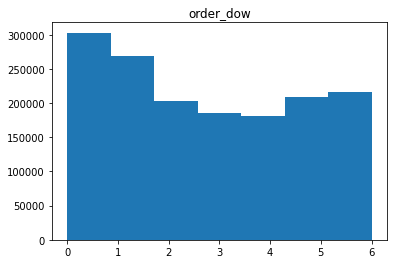

In [42]:
# 요일별 주문 현황

data['order_dow'].value_counts()

data.hist('order_dow',grid=False, bins=7)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5665ed8510>]],
      dtype=object)

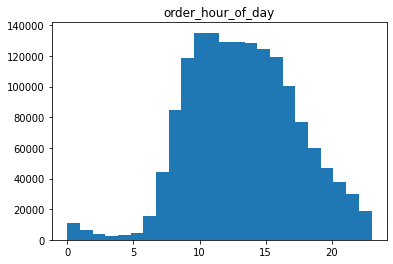

In [43]:
# 시간대별 주문 현황

data['order_hour_of_day'].value_counts()

data.hist('order_hour_of_day',grid=False, bins=24)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5665f24550>]],
      dtype=object)

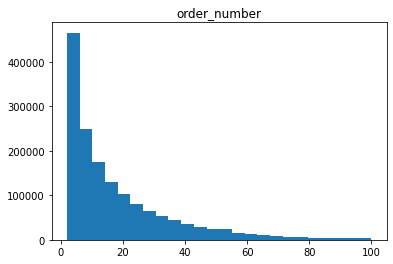

In [44]:
# 주문 횟수 현황 
data['order_number'].value_counts()

data.hist('order_number',grid=False, bins=24)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5665ed0350>]],
      dtype=object)

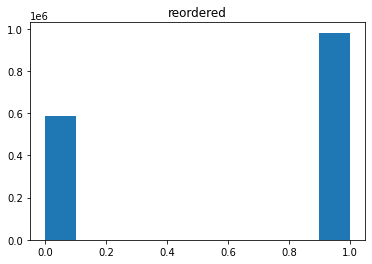

In [45]:
# 재주문 여부 현황 
data['reordered'].value_counts()

data.hist('reordered',grid=False)

# 3-1) 데이터 전처리(data preprocessing)
## 데이터 Encoding

In [46]:
data['user_id'] = data['user_id'].astype(int)
data['product_id'] = data['product_id'].astype(int)
data['order_id'] = data['order_id'].astype(int)
data['days_since_prior_order'] = data['days_since_prior_order'].astype(int)

data = data.set_index(['user_id']).sort_index()
data = data.reset_index()

In [47]:
# 유저 인덱스 인코딩
user_ids = data["user_id"].unique().tolist()
user2user_encoded = {x: i for i, x in enumerate(user_ids)}
#userencoded2user = {i: x for i, x in enumerate(user_ids)}

# 주문 인덱스 인코딩
order_ids = data["order_id"].unique().tolist()
order2order_encoded = {x: i for i, x in enumerate(order_ids)}
#order_encoded2order = {i: x for i, x in enumerate(order_ids)}

# 상품 인덱스 인코딩
product_ids = data["product_id"].unique().tolist()
product2product_encoded = {x: i for i, x in enumerate(product_ids)}
#product_encoded2product = {i: x for i, x in enumerate(product_ids)}

# 상품 이름 인코딩
pd_name_ids = data["product_name"].unique().tolist()
pd_name2pd_name_encoded = {x: i for i, x in enumerate(pd_name_ids)}
#pd_name_encoded2pd_name = {i: x for i, x in enumerate(pd_name_ids)}

# 상품 대분류 인덱스 인코딩
department_ids = data["Category_no"].unique().tolist()
department2department_encoded = {x: i for i, x in enumerate(department_ids)}
#department_encoded2department = {i: x for i, x in enumerate(department_ids)}

# 상품 소분류 인덱스 인코딩
aisle_ids = data["aisle_id"].unique().tolist()
aisle2aisle_encoded = {x: i for i, x in enumerate(aisle_ids)}
#aisle_encoded2aisle = {i: x for i, x in enumerate(aisle_ids)}

# 상품 대분류명 인덱스 인코딩
dept_name_ids = data["Category_name"].unique().tolist()
dept_name2dept_name_encoded = {x: i for i, x in enumerate(dept_name_ids)}
#dept_name_encoded2dept_name = {i: x for i, x in enumerate(dept_name_ids)}

# 상품 소분류명 인덱스 인코딩
aisle_name_ids = data["aisle"].unique().tolist()
aisle_name2aisle_name_encoded = {x: i for i, x in enumerate(aisle_name_ids)}
#aisle_name_encoded2aisle_name = {i: x for i, x in enumerate(aisle_name_ids)}

In [48]:
# 인코딩으로 바꾸기
data["user"] = data["user_id"].map(user2user_encoded)
data["product"] = data["product_id"].map(product2product_encoded)
data["order"] = data["order_id"].map(order2order_encoded)
data["pd_name"] = data["product_name"].map(pd_name2pd_name_encoded)

# data["department"] = data["department_id"].map(department2department_encoded)
# data["aisle"] = data["aisle"].map(aisle2aisle_encoded)
# data["dept_name"] = data["department"].map(dept_name2dept_name_encoded)
# data["aisle_name"] = data["aisle"].map(aisle_name2aisle_name_encoded)

# User기준으로 데이터 조정(feature engineering)
- 구매자 기준으로 데이터프레임 재생성
- feature engineering 추가 가능

In [49]:
order_hist = data.groupby(['user'])['order_id'].unique().apply(list).reset_index()
product_hist = data.groupby(['user'])['product_id'].apply(list).reset_index()
order_dow_hist = data.groupby(['user'])['order_dow'].apply(list).reset_index() # unique().적용해보기
order_hour_of_day_hist = data.groupby(['user'])['order_hour_of_day'].apply(list).reset_index()
days_since_prior_order_hist = data.groupby(['user'])['days_since_prior_order'].apply(list).reset_index()

In [50]:
data.groupby(['user'])['order_dow'].unique().apply(list)

user
0                      [5, 6]
1             [1, 2, 3, 5, 4]
2             [4, 6, 0, 1, 2]
3       [0, 4, 1, 6, 2, 5, 3]
4                [4, 5, 2, 1]
                ...          
9995    [0, 2, 3, 5, 1, 6, 4]
9996       [2, 4, 3, 1, 5, 6]
9997                [0, 6, 5]
9998    [0, 1, 2, 4, 6, 3, 5]
9999          [3, 2, 1, 5, 4]
Name: order_dow, Length: 10000, dtype: object

In [51]:
order_product_hist = data.groupby(['order'])['product_id'].apply(list).reset_index()

In [52]:
order_hist # 사용자의 주문목록

,user,order_id
0,0,"[3166874, 2766710, 501067, 1643524, 1657641, 7..."
1,1,"[1318871, 1261384, 2100631, 580568, 1680554, 2..."
2,2,"[964058, 2163945, 3349827, 1376443, 2655621, 1..."
3,3,"[2568280, 1763414, 3092533, 414538, 1538989, 3..."
4,4,"[251784, 3211781, 1469604, 1515062, 1342998, 2..."
...,...,...
9995,9995,"[1911923, 549547, 3130715, 2582484, 1258873, 2..."
9996,9996,"[992039, 2551929, 1053779, 2760916, 1877978, 1..."
9997,9997,"[2822394, 83431, 56199, 1597643, 1782820]"
9998,9998,"[3115357, 1209728, 164466, 3304125, 1983173, 1..."


In [53]:
# 최다(빈도) 구매자의 주문 수(heavy user)

max([x for x in order_hist['order_id'].apply(len)])

99

In [54]:
product_hist # 사용자가 구매한 상품

,user,product_id
0,0,"[45007, 22613, 28842, 21405, 26209, 19508, 248..."
1,1,"[12341, 6184, 10441, 46149, 196, 14309, 46149,..."
2,2,"[49075, 39121, 21724, 48017, 36695, 28289, 391..."
3,3,"[34213, 34574, 7029, 25305, 41950, 31338, 4235..."
4,4,"[2186, 42699, 25753, 46496, 42139, 24157, 2415..."
...,...,...
9995,9995,"[20512, 18918, 17948, 24489, 13176, 19057, 817..."
9996,9996,"[12099, 40706, 43129, 48119, 8523, 7192, 35761..."
9997,9997,"[24852, 24710, 27307, 32642, 20919, 12508, 267..."
9998,9998,"[23650, 26165, 11087, 48775, 36305, 47977, 428..."


In [55]:
order_product_hist

,order,product_id
0,0,"[45007, 22613, 28842, 21405, 26209, 19508, 248..."
1,1,"[45007, 36695, 21405, 20339, 24830, 26209, 182..."
2,2,"[45007, 20339, 26209, 43662, 28842, 8057, 4399..."
3,3,"[47823, 20339, 4455, 26298, 17284, 4855, 45007..."
4,4,"[43662, 35855, 5621, 33000, 34012, 24940, 4455..."
...,...,...
155574,155574,"[49273, 34134, 35206, 35473, 10673]"
155575,155575,"[6052, 1716, 49296, 31268, 41673, 48337, 47167..."
155576,155576,"[4978, 24613, 1716, 6052, 49296]"
155577,155577,"[27966, 49273, 49296, 35206, 48337, 7658, 4015..."


In [56]:
# 주문 당 가장 많은 제품을 구입한 경우
max([x for x in order_product_hist['product_id'].apply(len)])

145

In [57]:
order_dow_hist

,user,order_dow
0,0,"[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, ..."
1,1,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
2,2,"[4, 4, 4, 4, 4, 4, 6, 6, 6, 6, 6, 6, 6, 6, 6, ..."
3,3,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4, 4, 4, 4, ..."
4,4,"[4, 4, 4, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, ..."
...,...,...
9995,9995,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
9996,9996,"[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, ..."
9997,9997,"[0, 0, 0, 0, 0, 0, 0, 0, 6, 6, 6, 6, 6, 6, 6, ..."
9998,9998,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, ..."


In [58]:
order_hour_of_day_hist

,user,order_hour_of_day
0,0,"[13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 1..."
1,1,"[10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 1..."
2,2,"[10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 1..."
3,3,"[9, 9, 9, 9, 9, 9, 9, 9, 9, 14, 14, 14, 14, 14..."
4,4,"[14, 14, 14, 14, 14, 14, 18, 18, 18, 18, 18, 1..."
...,...,...
9995,9995,"[15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 1..."
9996,9996,"[13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 1..."
9997,9997,"[19, 19, 19, 19, 19, 19, 19, 19, 21, 21, 21, 2..."
9998,9998,"[14, 14, 14, 14, 14, 14, 14, 14, 14, 9, 9, 9, ..."


In [59]:
days_since_prior_order_hist

,user,days_since_prior_order
0,0,"[27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 2..."
1,1,"[7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, ..."
2,2,"[10, 10, 10, 10, 10, 10, 30, 30, 30, 30, 30, 3..."
3,3,"[11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 1..."
4,4,"[8, 8, 8, 30, 30, 30, 20, 20, 20, 20, 20, 20, ..."
...,...,...
9995,9995,"[22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 2..."
9996,9996,"[19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 1..."
9997,9997,"[18, 18, 18, 18, 18, 18, 18, 18, 30, 30, 30, 3..."
9998,9998,"[28, 28, 28, 28, 28, 28, 28, 28, 28, 30, 30, 3..."


In [60]:
# User dataset 생성 (학습에 사용할 데이터, prior order:[data['eval_set']=='prior'])
user_data = data[['user','user_id']].merge(order_hist, how='left').merge(product_hist, how='left').merge(order_dow_hist, how='left').merge(order_hour_of_day_hist, how = 'left').merge(days_since_prior_order_hist,how='left') #eval_set
user_data

,user,user_id,order_id,product_id,order_dow,order_hour_of_day,days_since_prior_order
0,0,48,"[3166874, 2766710, 501067, 1643524, 1657641, 7...","[45007, 22613, 28842, 21405, 26209, 19508, 248...","[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, ...","[13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 1...","[27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 2..."
1,0,48,"[3166874, 2766710, 501067, 1643524, 1657641, 7...","[45007, 22613, 28842, 21405, 26209, 19508, 248...","[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, ...","[13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 1...","[27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 2..."
2,0,48,"[3166874, 2766710, 501067, 1643524, 1657641, 7...","[45007, 22613, 28842, 21405, 26209, 19508, 248...","[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, ...","[13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 1...","[27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 2..."
3,0,48,"[3166874, 2766710, 501067, 1643524, 1657641, 7...","[45007, 22613, 28842, 21405, 26209, 19508, 248...","[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, ...","[13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 1...","[27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 2..."
4,0,48,"[3166874, 2766710, 501067, 1643524, 1657641, 7...","[45007, 22613, 28842, 21405, 26209, 19508, 248...","[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, ...","[13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 1...","[27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 2..."
...,...,...,...,...,...,...,...
1566105,9999,206185,"[2275747, 1597200, 497488, 1874713, 1286942, 1...","[30217, 35473, 25915, 14852, 15829, 24613, 399...","[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, ...","[8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, ...","[26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 3..."
1566106,9999,206185,"[2275747, 1597200, 497488, 1874713, 1286942, 1...","[30217, 35473, 25915, 14852, 15829, 24613, 399...","[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, ...","[8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, ...","[26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 3..."
1566107,9999,206185,"[2275747, 1597200, 497488, 1874713, 1286942, 1...","[30217, 35473, 25915, 14852, 15829, 24613, 399...","[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, ...","[8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, ...","[26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 3..."
1566108,9999,206185,"[2275747, 1597200, 497488, 1874713, 1286942, 1...","[30217, 35473, 25915, 14852, 15829, 24613, 399...","[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, ...","[8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, ...","[26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 3..."


In [61]:
user_data = user_data.drop_duplicates('user') # 중복데이터 삭제
user_data.shape

(10000, 7)

In [62]:
data_product_prior=data['product'][data['eval_set']=='prior']

# predict_label 생성 및 데이터 분할

In [63]:
user_data['predict_labels'] = user_data['product_id'].apply(lambda x: int(random.uniform(0,data['product_id'].max())))
#user_data['predict_labels'] = user_data['product_id'].apply(lambda x: int(random.uniform(0,data['product'].max())))
# (random.uniform(0,data["product"][data['eval_set']=='prior'].max())) train 데이터의 product중 하나 (=> 알맞은 데이터가 들어가는지 코드 검증 필요)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [64]:
user_data

,user,user_id,order_id,product_id,order_dow,order_hour_of_day,days_since_prior_order,predict_labels
0,0,48,"[3166874, 2766710, 501067, 1643524, 1657641, 7...","[45007, 22613, 28842, 21405, 26209, 19508, 248...","[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, ...","[13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 1...","[27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 2...",28640
124,1,52,"[1318871, 1261384, 2100631, 580568, 1680554, 2...","[12341, 6184, 10441, 46149, 196, 14309, 46149,...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 1...","[7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, ...",47853
298,2,62,"[964058, 2163945, 3349827, 1376443, 2655621, 1...","[49075, 39121, 21724, 48017, 36695, 28289, 391...","[4, 4, 4, 4, 4, 4, 6, 6, 6, 6, 6, 6, 6, 6, 6, ...","[10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 1...","[10, 10, 10, 10, 10, 10, 30, 30, 30, 30, 30, 3...",48619
393,3,63,"[2568280, 1763414, 3092533, 414538, 1538989, 3...","[34213, 34574, 7029, 25305, 41950, 31338, 4235...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4, 4, 4, 4, ...","[9, 9, 9, 9, 9, 9, 9, 9, 9, 14, 14, 14, 14, 14...","[11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 1...",26678
895,4,83,"[251784, 3211781, 1469604, 1515062, 1342998, 2...","[2186, 42699, 25753, 46496, 42139, 24157, 2415...","[4, 4, 4, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, ...","[14, 14, 14, 14, 14, 14, 18, 18, 18, 18, 18, 1...","[8, 8, 8, 30, 30, 30, 20, 20, 20, 20, 20, 20, ...",19366
...,...,...,...,...,...,...,...,...
1564717,9995,206104,"[1911923, 549547, 3130715, 2582484, 1258873, 2...","[20512, 18918, 17948, 24489, 13176, 19057, 817...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 1...","[22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 2...",36353
1565137,9996,206123,"[992039, 2551929, 1053779, 2760916, 1877978, 1...","[12099, 40706, 43129, 48119, 8523, 7192, 35761...","[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, ...","[13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 1...","[19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 1...",29010
1565463,9997,206144,"[2822394, 83431, 56199, 1597643, 1782820]","[24852, 24710, 27307, 32642, 20919, 12508, 267...","[0, 0, 0, 0, 0, 0, 0, 0, 6, 6, 6, 6, 6, 6, 6, ...","[19, 19, 19, 19, 19, 19, 19, 19, 21, 21, 21, 2...","[18, 18, 18, 18, 18, 18, 18, 18, 30, 30, 30, 3...",37642
1565511,9998,206174,"[3115357, 1209728, 164466, 3304125, 1983173, 1...","[23650, 26165, 11087, 48775, 36305, 47977, 428...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, ...","[14, 14, 14, 14, 14, 14, 14, 14, 14, 9, 9, 9, ...","[28, 28, 28, 28, 28, 28, 28, 28, 28, 30, 30, 3...",11406


In [65]:
train_data = user_data[(user_data.user>=30) &
                       (user_data.user<=39)]
test_data = user_data[(user_data.user>=40) &
                      (user_data.user<=59)]

# 모델

In [66]:
data["product_id"].max()

49687

In [67]:
data["product"].max()

35053

In [68]:
# 하이퍼파라미터 정의

EMBEDDING_DIMS = 16
DENSE_UNITS = 64
DROPOUT_PCT = 0.1
ALPHA = 0.1
NUM_CLASSES = data["product_id"].max() + 2 
LEARNING_RATE = 0.1

In [69]:
# custom layers

import tensorflow as tf
class MaskedEmbeddingsAggregatorLayer(tf.keras.layers.Layer):
    def __init__(self, agg_mode='sum', **kwargs):
        super(MaskedEmbeddingsAggregatorLayer, self).__init__(**kwargs)

        if agg_mode not in ['sum', 'mean']:
            raise NotImplementedError('mode {} not implemented!'.format(agg_mode))
        self.agg_mode = agg_mode
    
    @tf.function
    def call(self, inputs, mask=None):
        masked_embeddings = tf.ragged.boolean_mask(inputs, mask)
        if self.agg_mode == 'sum':
            aggregated =  tf.reduce_sum(masked_embeddings, axis=1)
        elif self.agg_mode == 'mean':
            aggregated = tf.reduce_mean(masked_embeddings, axis=1)
        return aggregated
    
    def get_config(self):
        # this is used when loading a saved model that uses a custom layer
        return {'agg_mode': self.agg_mode}
    
class L2NormLayer(tf.keras.layers.Layer):
    def __init__(self, **kwargs):
        super(L2NormLayer, self).__init__(**kwargs)
    
    @tf.function
    def call(self, inputs, mask=None):
        if mask is not None:
            inputs = tf.ragged.boolean_mask(inputs, mask).to_tensor()
        return tf.math.l2_normalize(inputs, axis=-1)

    def compute_mask(self, inputs, mask):
        return mask

In [70]:
# modeling
import tensorflow as tf
import datetime
import os

input_user = tf.keras.Input(shape=(None, ), name='user') 
input_product_hist = tf.keras.layers.Input(shape=(None,), name='product_hist')
input_order_dow_hist = tf.keras.layers.Input(shape=(None,), name='order_dow_hist')
input_order_hour_of_day_hist = tf.keras.Input(shape=(None, ), name='order_hour_of_day_hist')
input_days_since_prior_order_hist = tf.keras.Input(shape=(None, ), name='days_since_prior_order_hist')


# layer 구성
features_embedding_layer = tf.keras.layers.Embedding(input_dim=NUM_CLASSES, output_dim=EMBEDDING_DIMS, 
                                            mask_zero=True, trainable=True, name='features_embeddings')
labels_embedding_layer = tf.keras.layers.Embedding(input_dim=NUM_CLASSES, output_dim=EMBEDDING_DIMS, 
                                            mask_zero=True, trainable=True, name='labels_embeddings')

avg_embeddings = MaskedEmbeddingsAggregatorLayer(agg_mode='mean', name='aggregate_embeddings')

dense_1 = tf.keras.layers.Dense(units=DENSE_UNITS, name='dense_1')
dense_2 = tf.keras.layers.Dense(units=DENSE_UNITS, name='dense_2')
dense_3 = tf.keras.layers.Dense(units=DENSE_UNITS, name='dense_3')
l2_norm_1 = L2NormLayer(name='l2_norm_1')
dense_output = tf.keras.layers.Dense(NUM_CLASSES, activation=tf.nn.softmax, name='dense_output')

# feature 투입
features_embeddings = features_embedding_layer(input_user)
l2_norm_features = l2_norm_1(features_embeddings)
avg_features = avg_embeddings(l2_norm_features)

labels_product_embeddings = labels_embedding_layer(input_product_hist)
l2_norm_product = l2_norm_1(labels_product_embeddings)
avg_product = avg_embeddings(l2_norm_product)

labels_order_dow_embeddings = labels_embedding_layer(input_order_dow_hist)
l2_norm_order_dow = l2_norm_1(labels_order_dow_embeddings)
avg_order_dow = avg_embeddings(l2_norm_order_dow)

labels_order_hour_embeddings = labels_embedding_layer(input_order_hour_of_day_hist)
l2_norm_order_hour = l2_norm_1(labels_order_hour_embeddings)
avg_order_hour = avg_embeddings(l2_norm_order_hour)

labels_since_prior_embeddings = labels_embedding_layer(input_days_since_prior_order_hist)
l2_norm_since_prior = l2_norm_1(labels_since_prior_embeddings)
avg_since_prior = avg_embeddings(l2_norm_since_prior)


print(avg_features)
print(avg_order_dow)
print(avg_order_hour)
print(avg_since_prior)

# 임베딩 벡터들 연결
concat_inputs = tf.keras.layers.Concatenate(axis=1)([avg_product,
                                                     avg_order_dow, 
                                                     avg_order_hour,
                                                     avg_since_prior
                                                     ])
# Dense Layers
dense_1_features = dense_1(concat_inputs)
dense_1_relu = tf.keras.layers.ReLU(name='dense_1_relu')(dense_1_features)
dense_1_batch_norm = tf.keras.layers.BatchNormalization(name='dense_1_batch_norm')(dense_1_relu)

dense_2_features = dense_2(dense_1_relu)
dense_2_relu = tf.keras.layers.ReLU(name='dense_2_relu')(dense_2_features)
dense_2_batch_norm = tf.keras.layers.BatchNormalization(name='dense_2_batch_norm')(dense_2_relu)

dense_3_features = dense_3(dense_2_relu)
dense_3_relu = tf.keras.layers.ReLU(name='dense_3_relu')(dense_3_features)
dense_3_batch_norm = tf.keras.layers.BatchNormalization(name='dense_3_batch_norm')(dense_3_relu)

outputs = dense_output(dense_3_batch_norm)

#Optimizer
optimiser = tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE)

#--- prep model
model = tf.keras.models.Model(
    inputs=[input_product_hist,
            input_order_dow_hist,
            input_order_hour_of_day_hist,
            input_days_since_prior_order_hist
            ],
    outputs=[outputs]
)
logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)
model.compile(optimizer=optimiser, loss='sparse_categorical_crossentropy', metrics=['acc']) 

model.summary()

KerasTensor(type_spec=TensorSpec(shape=(None, 16), dtype=tf.float32, name=None), name='aggregate_embeddings/PartitionedCall:0', description="created by layer 'aggregate_embeddings'")
KerasTensor(type_spec=TensorSpec(shape=(None, 16), dtype=tf.float32, name=None), name='aggregate_embeddings/PartitionedCall:0', description="created by layer 'aggregate_embeddings'")
KerasTensor(type_spec=TensorSpec(shape=(None, 16), dtype=tf.float32, name=None), name='aggregate_embeddings/PartitionedCall:0', description="created by layer 'aggregate_embeddings'")
KerasTensor(type_spec=TensorSpec(shape=(None, 16), dtype=tf.float32, name=None), name='aggregate_embeddings/PartitionedCall:0', description="created by layer 'aggregate_embeddings'")
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 product_hist (InputLayer)      [(None, None)]       0 

In [71]:
train_data

,user,user_id,order_id,product_id,order_dow,order_hour_of_day,days_since_prior_order,predict_labels
5193,30,486,"[2505013, 1859176, 578638, 2453743, 1675581, 1...","[31066, 11520, 29307, 38051, 30489, 39922, 137...","[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ...","[19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 1...","[30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 3...",28979
5482,31,491,"[1329272, 2065829, 1191993]","[4853, 20114, 35376, 13176, 19057, 49683, 7175...","[6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 2, 2, 2, ...","[10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 1...","[22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 2...",25251
5514,32,523,"[2324216, 2823017, 1179143, 2504221, 2406452, ...","[21694, 12831, 46364, 21694, 27086, 5785, 2485...","[5, 5, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[15, 15, 15, 16, 16, 16, 16, 11, 11, 11, 11, 1...","[16, 16, 16, 24, 24, 24, 24, 30, 30, 30, 30, 3...",12382
5565,33,538,"[3115305, 2311352, 2336727, 556480, 1392748, 2...","[48364, 24184, 7664, 44457, 36849, 44245, 2803...","[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 1, 1, 1, 1, ...","[8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 16, 16, 16, ...","[30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 3...",30245
5800,34,558,"[2352353, 2996263, 2792437, 1551696, 542577, 1...","[13740, 5194, 1511, 12813, 33572, 16994, 16254...","[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...","[16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 1...","[1, 1, 1, 1, 1, 1, 1, 6, 6, 6, 6, 6, 6, 6, 6, ...",38130
6108,35,559,"[388961, 980993, 1517965, 1521472, 2180413, 31...","[44628, 5991, 47734, 24489, 24964, 32689, 3412...","[6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, ...","[11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 1...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",29049
6349,36,562,"[912968, 2829143, 2680210, 975257, 2211584, 12...","[38928, 15541, 38928, 38928, 38928, 38928, 167...","[5, 5, 2, 5, 2, 3, 3, 5, 3, 3, 2, 2, 4, 2, 2, ...","[12, 12, 11, 11, 11, 9, 9, 14, 7, 9, 9, 8, 9, ...","[3, 3, 11, 3, 4, 8, 8, 2, 5, 7, 6, 7, 2, 5, 5,...",39861
6412,37,577,"[2944620, 994838, 1002626, 148818, 1241717]","[30974, 20406, 10243, 22922, 31553, 28842, 310...","[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...","[23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 2...","[30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 3...",2747
6483,38,614,"[2851369, 2051249, 2558969]","[13176, 26131, 47912, 8490, 6933, 4210, 16349,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 1, 1, ...","[13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 20, 2...","[30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 3...",31212
6502,39,620,"[2536785, 2461157, 1806302, 1048253, 416736]","[12448, 36534, 13948, 12448, 36534, 36534, 139...","[3, 3, 3, 5, 5, 4, 4, 4, 4, 4, 4]","[18, 18, 18, 13, 13, 17, 17, 10, 10, 18, 18]","[30, 30, 30, 30, 30, 30, 30, 28, 28, 30, 30]",30464


In [72]:
# 학습(training)
history = model.fit([tf.keras.preprocessing.sequence.pad_sequences(train_data['product_id']),
                     tf.keras.preprocessing.sequence.pad_sequences(train_data['order_dow']),
                     tf.keras.preprocessing.sequence.pad_sequences(train_data['order_hour_of_day']), #+ 1e-10, dtype=float
                     tf.keras.preprocessing.sequence.pad_sequences(train_data['days_since_prior_order'])
                    ],train_data['predict_labels'].values,
                  #batch_size=16,
                  steps_per_epoch=1, epochs=300)

Epoch 1/300
1/1 [==============================] - 4s 4s/step - loss: 10.8049 - acc: 0.0000e+00
Epoch 2/300
1/1 [==============================] - 0s 25ms/step - loss: 10.2994 - acc: 0.1000
Epoch 3/300
1/1 [==============================] - 0s 23ms/step - loss: 9.5476 - acc: 0.2000
Epoch 4/300
1/1 [==============================] - 0s 25ms/step - loss: 7.1689 - acc: 0.1000
Epoch 5/300
1/1 [==============================] - 0s 25ms/step - loss: 4.1788 - acc: 0.3000
Epoch 6/300
1/1 [==============================] - 0s 22ms/step - loss: 3.0742 - acc: 0.4000
Epoch 7/300
1/1 [==============================] - 0s 22ms/step - loss: 2.4704 - acc: 0.3000
Epoch 8/300
1/1 [==============================] - 0s 24ms/step - loss: 2.4995 - acc: 0.4000
Epoch 9/300
1/1 [==============================] - 0s 23ms/step - loss: 1.7371 - acc: 0.3000
Epoch 10/300
1/1 [==============================] - 0s 24ms/step - loss: 1.7901 - acc: 0.4000
Epoch 11/300
1/1 [==============================] - 0s 23ms/step 

In [73]:
# 모델 저장
model.save("/content/drive/MyDrive/마켓컬리/model_2.h5")

/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


In [74]:
# 모델 예측결과 추출
pred = model.predict([tf.keras.preprocessing.sequence.pad_sequences(test_data['product_id']),
           tf.keras.preprocessing.sequence.pad_sequences(test_data['order_dow']),
           tf.keras.preprocessing.sequence.pad_sequences(test_data['order_hour_of_day']), #+ 1e-10, dtype=float
           tf.keras.preprocessing.sequence.pad_sequences(test_data['days_since_prior_order'])
           ])

pred

array([[1.3945741e-09, 1.6070748e-09, 1.3422928e-09, ..., 1.0768667e-09,
        1.6228893e-09, 1.4988675e-09],
       [8.9978724e-10, 9.5896835e-10, 8.5825386e-10, ..., 7.7373380e-10,
        9.8483977e-10, 9.2186675e-10],
       [8.9978724e-10, 9.5896835e-10, 8.5825386e-10, ..., 7.7373380e-10,
        9.8483977e-10, 9.2186675e-10],
       ...,
       [8.9978724e-10, 9.5896835e-10, 8.5825386e-10, ..., 7.7373380e-10,
        9.8483977e-10, 9.2186675e-10],
       [8.9978724e-10, 9.5896835e-10, 8.5825386e-10, ..., 7.7373380e-10,
        9.8483977e-10, 9.2186675e-10],
       [8.9978724e-10, 9.5896835e-10, 8.5825386e-10, ..., 7.7373380e-10,
        9.8483977e-10, 9.2186675e-10]], dtype=float32)

In [75]:
# candidate generation: 
###### 각 user당 top-7개의 추천 후보 데이터(predict_label)를 뽑아낸다.
import numpy as np
N = 20
k = np.sort((-pred).argsort()[:,:N])
print(k)
k = k.flatten()
k[k>data["product"].max()]=0
k = np.unique(k)

[[ 1319  2747  3699  7467  7800 12382 14859 25251 28979 29049 29797 30245
  30464 30725 31212 33455 38130 39861 47460 47516]
 [ 2747  4841  5150  6066  6505  6588 12382 12459 16082 25251 28979 29049
  30464 31212 35882 38130 39020 39861 42981 46078]
 [ 2747  4841  5150  6066  6505  6588 12382 12459 16082 25251 28979 29049
  30464 31212 35882 38130 39020 39861 42981 46078]
 [ 2747  4841  5150  6066  6505  6588 12382 12459 16082 25251 28979 29049
  30464 31212 35882 38130 39020 39861 42981 46078]
 [ 2747  4841  5150  6066  6505  6588 12382 12459 16082 25251 28979 29049
  30464 31212 35882 38130 39020 39861 42981 46078]
 [ 2747  4841  5150  6066  6505  6588 12382 12459 16082 25251 28979 29049
  30464 31212 35882 38130 39020 39861 42981 46078]
 [ 2747  4841  5150  6066  6505  6588 12382 12459 16082 25251 28979 29049
  30464 31212 35882 38130 39020 39861 42981 46078]
 [ 2747  4841  6066  6505  6588  6744 12382 12459 15131 16082 18722 25251
  28979 29049 30464 31212 34071 38130 39020 39861]


In [76]:
k

array([    0,   797,  1319,  2747,  3699,  4841,  5150,  5657,  6066,
        6444,  6505,  6588,  6744,  7467,  7800,  9244, 12332, 12382,
       12459, 12589, 14859, 15131, 16082, 18722, 25251, 28803, 28979,
       29049, 29797, 30245, 30464, 30725, 31212, 33455, 34071])